# STOR 535: Lab3
### Submit the PDF version of this homework to gradescope by March 11

In [1]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt

## Gambler's Ruin Problem


In this problem, you will explore the Gambler's Ruin problem by visualizing multiple random walk trials. In the Gambler's Ruin problem, a gambler starts with an `initial budget` and bets \$1 repeatedly until one of two outcomes occurs:

- **Ruin:** The gambler loses all their money (capital reaches 0).
- **Win:** The gambler reaches a predefined target capital.

At each bet:
- With probability **p**, the gambler wins \$1.
- With probability **(1 - p)**, the gambler loses \$1.

We'll use these default parameters:
- **Initial Budget:** B = 10
- **Target Capital:** C = 20
- **Winning Probability:** p = 0.45

Before writing your own simulation function, you'll first visualize some trials to see how the random walk behaves.


### 1. Single-Trial Visualization

**Task:**  
- Set the random seed to 1.
- Simulate a single random walk (one trial) of the gambler’s capital over time.
- Visualize the trajectory until the gambler either reaches ruin (0) or wins (reaches target capital).

*Hint:* Use a loop to simulate the bets and record the capital at each step.


In [2]:
def moneybetting(seed):
    np.random.seed(seed)
    step = 0
    B = 10
    C = 20
    p = .45 
    money = []
    steparr = [0]

    while B > 0 and B < 20:
        money.append(B)
        B += np.random.choice([1,-1], p=[p, 1-p])
        step+=1 
        steparr.append(step)

    money.append(B)
    return steparr, money

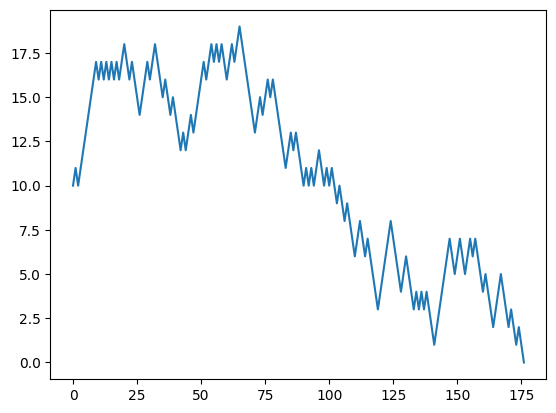

In [3]:
steparr, money = moneybetting(1)
plt.plot(steparr, money)
plt.show()

### 2. Multiple-Trial Visualization

**Task:**  
- For each random seed in the list `[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]`, simulate an independent trial.
- Plot all 10 trajectories on a single graph to compare the variability in outcomes.


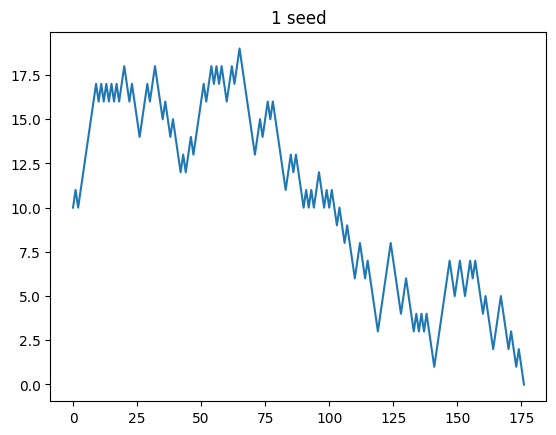

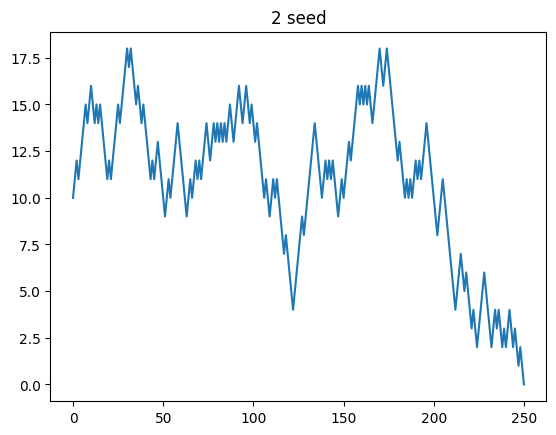

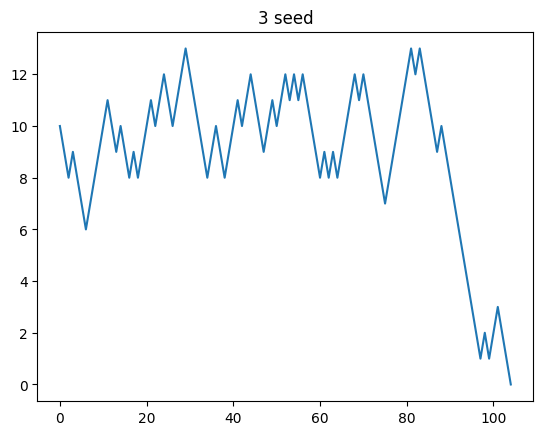

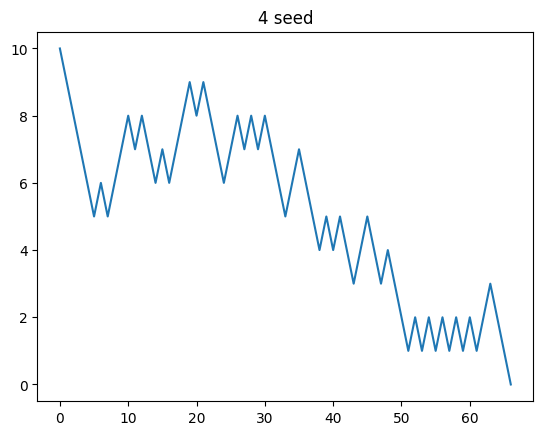

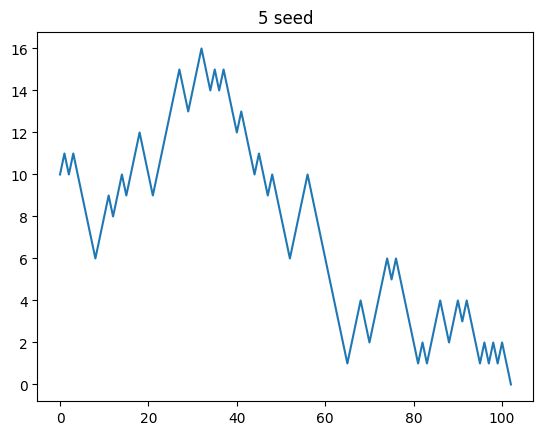

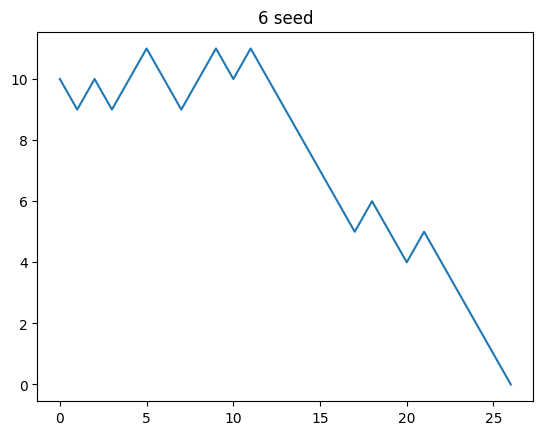

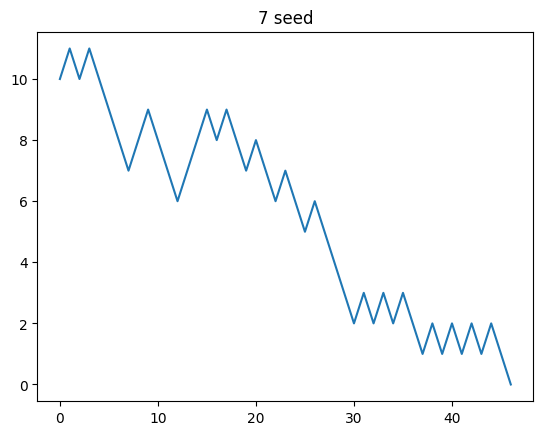

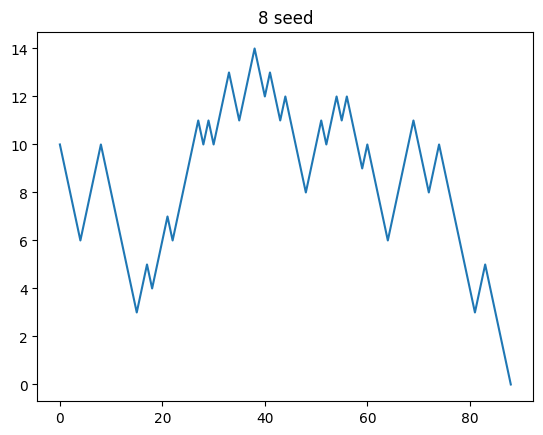

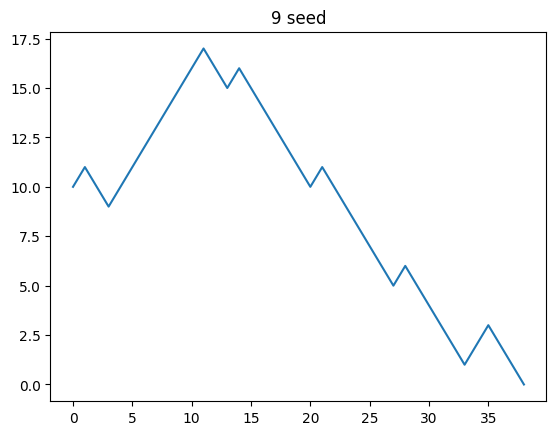

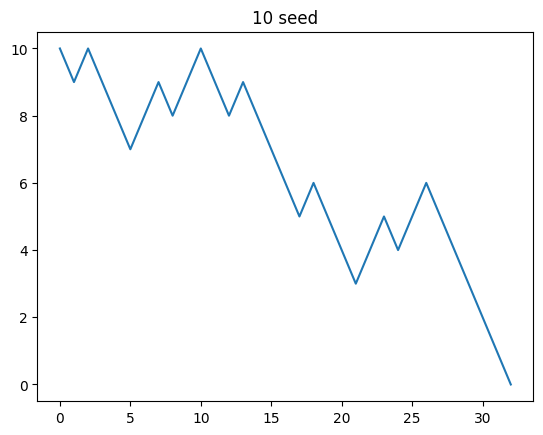

In [4]:
for i in range(1, 11):
    steparr, money = moneybetting(i)
    plt.plot(steparr, money)
    plt.title(f'{i} seed')
    plt.show()

### 3. Simulation Function Implementation

**Task:**  
Write a function `simulate_gambler_ruin(initial_budget, target, p)` that:
- Simulates the gambler’s game until either ruin (capital = 0) or win (capital = target) is reached.
- Returns:
  - The trajectory of the gambler's capital over time.
  - The final exit state (0 for ruin, or the target capital).


In [5]:
np.random.seed(1)
def simulate_gambler_ruin(initial_budget, target, p):
    B = initial_budget
    money = [B]

    while B > 0 and B < target:
        B += np.random.choice([1,-1], p=[p, 1-p])
        money.append(B)

    return money, B

### 4. Density Distribution of Exit States

**Task:**  
- Using the function `simulate_gambler_ruin`, run 10,000 independent trials.
- Record the exit state (either 0 or the target capital) for each trial.
- Visualize the density distribution (for example, using a histogram) of these exit states.


In [7]:
np.random.seed(1)
winlose = []
for i in range(10000):
    money, B = simulate_gambler_ruin(10,20,.45)
    winlose.append(B)

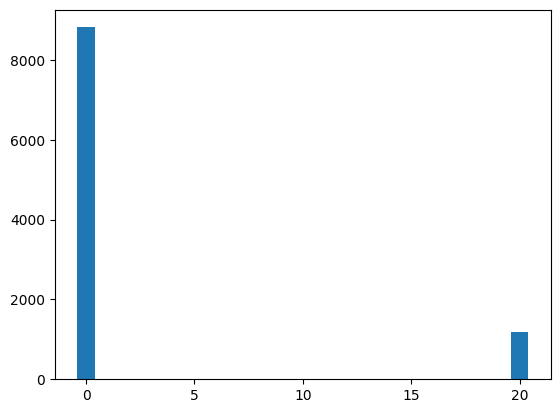

In [10]:
fig, ax = plt.subplots()
x = [0,20]
y = [winlose.count(0), winlose.count(20)]
ax.bar(x,y)
plt.show()

### 5. Effect of Initial Budget on Outcomes

**Task:**  
- Fix the target capital at C = 20.
- Vary the initial budget (B) using values from the list `[2, 4, 6, 8, 10, 11, 12, 14, 16, 18]`.
- For each initial budget, simulate the game 1000 times and record the exit state.
- Use line plots to visualize how the distribution of exit states changes with different initial budgets.


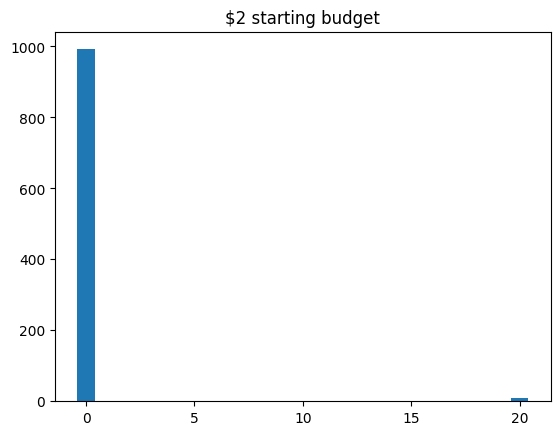

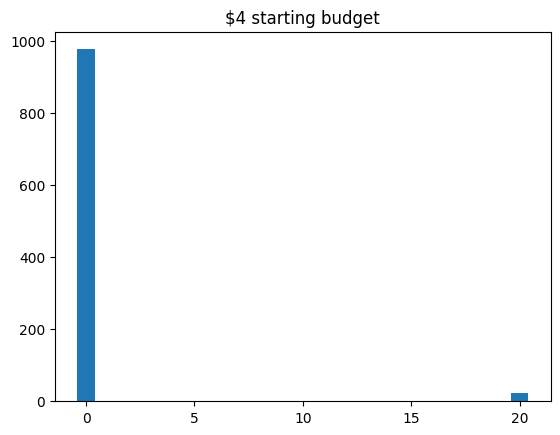

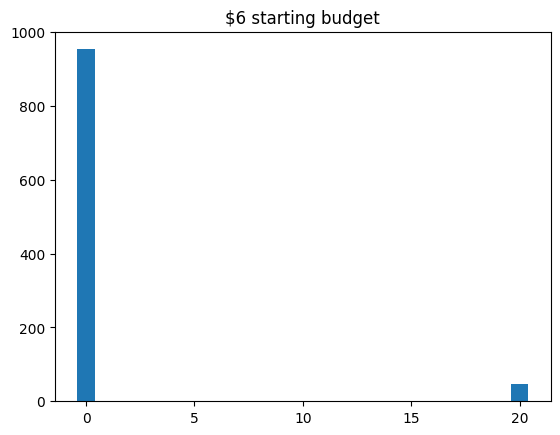

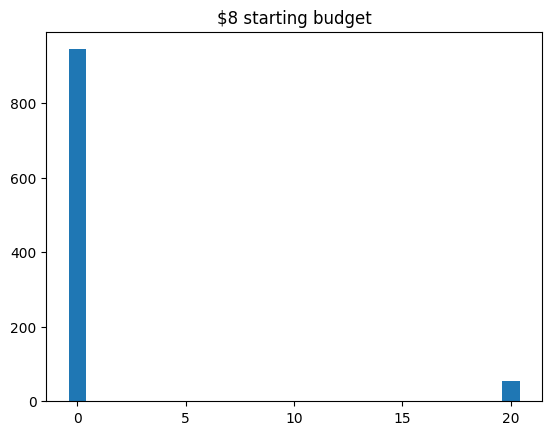

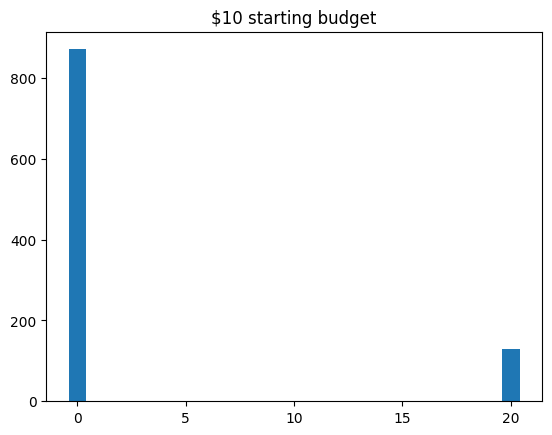

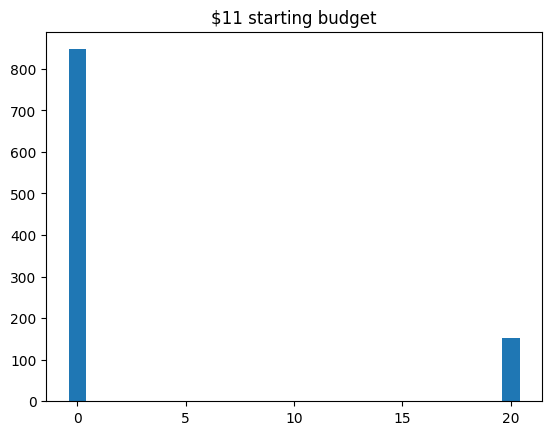

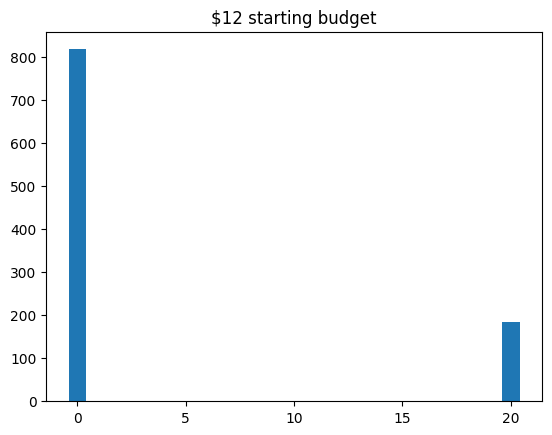

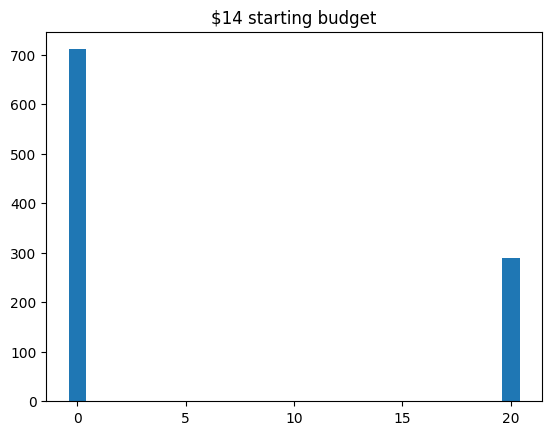

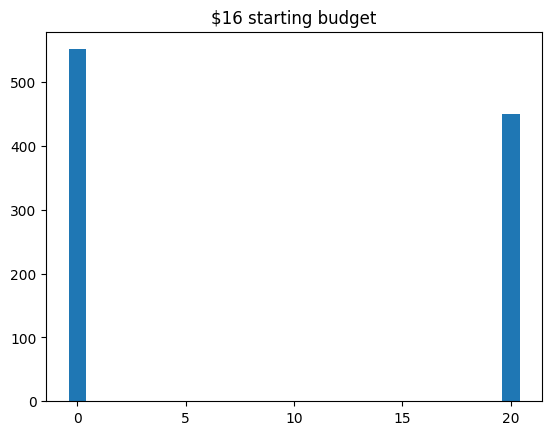

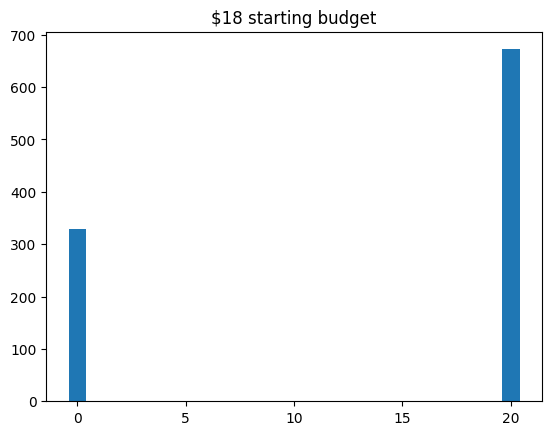

In [15]:
np.random.seed(1)

B = [2, 4, 6, 8, 10, 11, 12, 14, 16, 18]

for j in B:
    winlose = []
    for i in range(1000):
        money, B = simulate_gambler_ruin(j,20,.45)
        winlose.append(B)
    fig, ax = plt.subplots()
    x = [0,20]
    y = [winlose.count(0), winlose.count(20)]
    ax.bar(x,y)
    plt.title(f'${j} starting budget')
    plt.show()

### 6. Impact of Winning Probability on Outcomes

**Task:**  
- With fixed parameters (B = 10 and C = 20), vary the winning probability `p` using the list `[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]`.
- For each value of `p`, simulate the game 1000 times and record the exit state.
- Visualize how changes in `p` affect the win rate or distribution of outcomes using line plots.


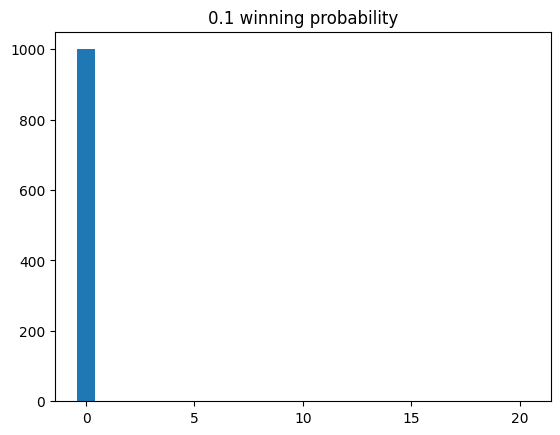

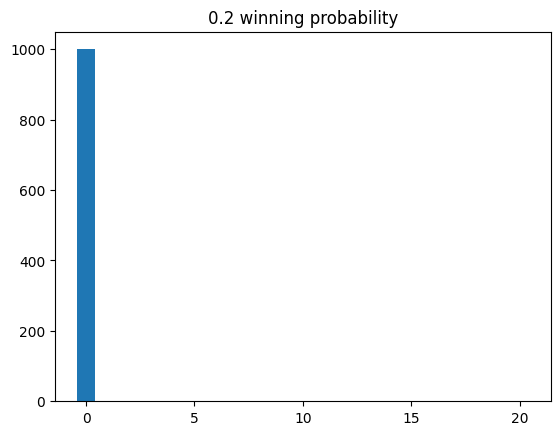

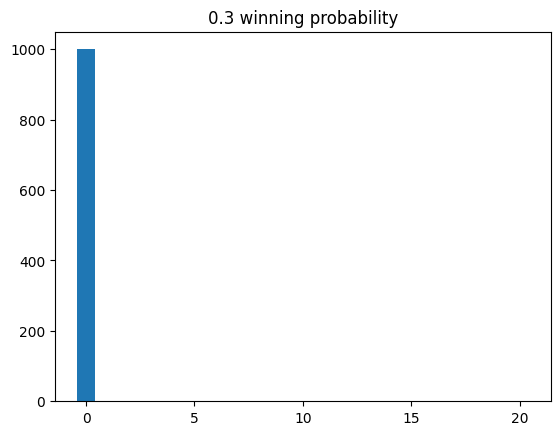

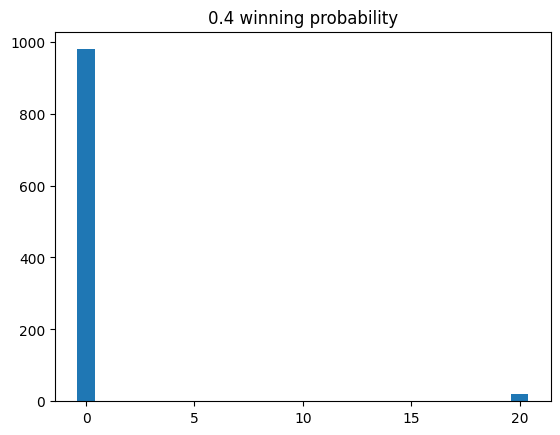

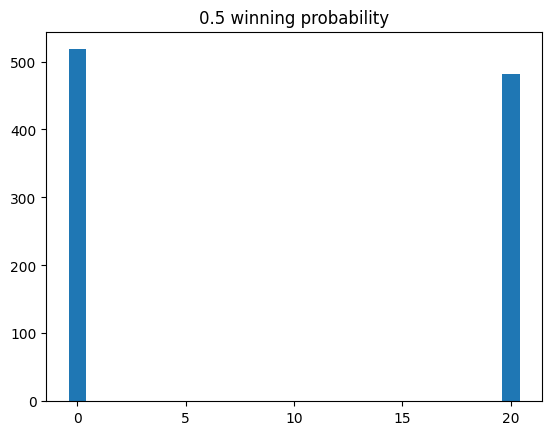

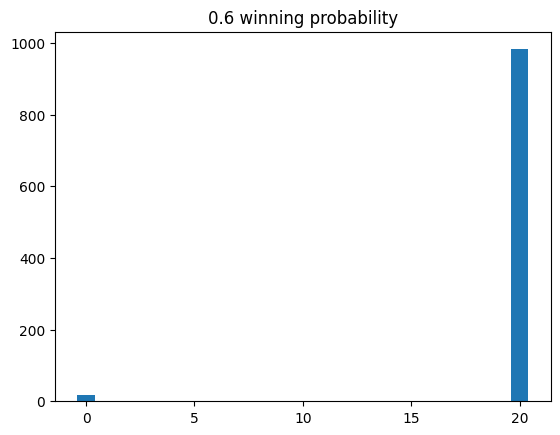

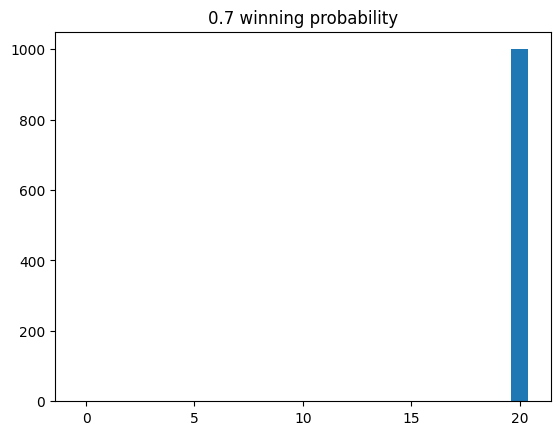

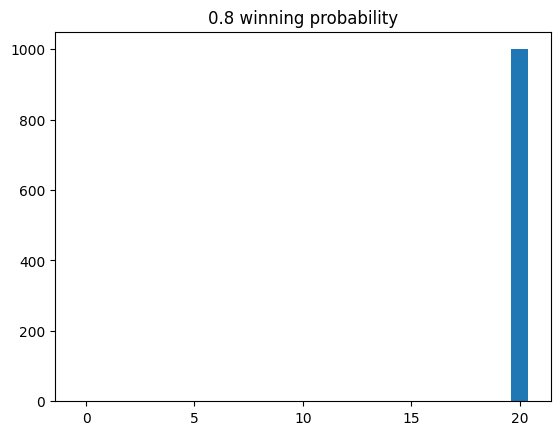

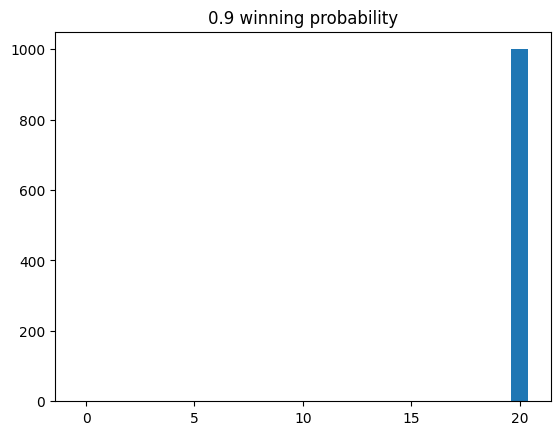

In [16]:
np.random.seed(1)

p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

for j in p:
    winlose = []
    for i in range(1000):
        money, B = simulate_gambler_ruin(10,20,j)
        winlose.append(B)
    fig, ax = plt.subplots()
    x = [0,20]
    y = [winlose.count(0), winlose.count(20)]
    ax.bar(x,y)
    plt.title(f'{j} winning probability')
    plt.show()

### 7. Relationship Between Target Capital and Number of Bets

**Task:**  
- With fixed parameters (p = 0.45 and B = 10), vary the target capital (C) using the list `[20, 30, 40, 50, 60, 70]`.
- For each target capital, simulate the game 1000 times and record the number of bets taken until the game stops.
- Visualize the relationship between the target capital and the average number of bets required using a line plot.


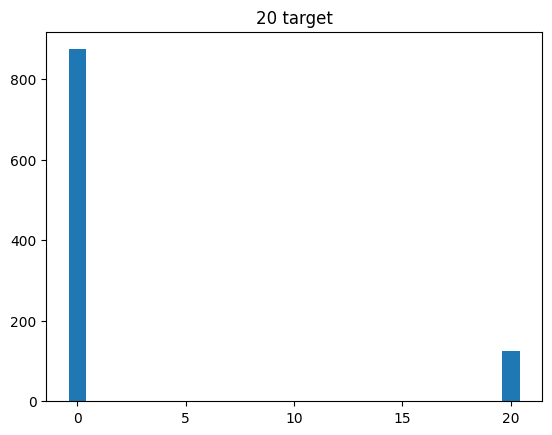

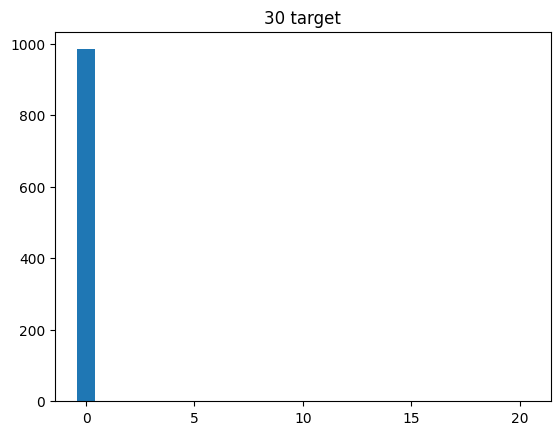

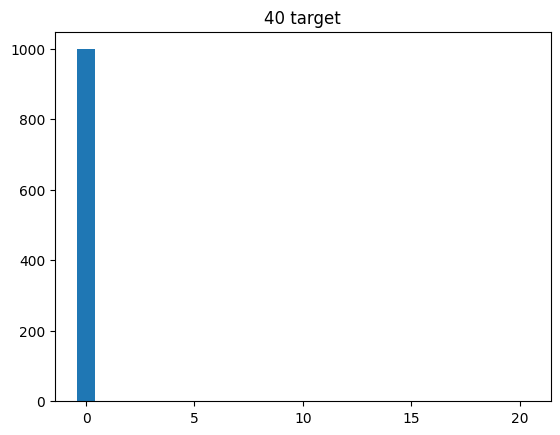

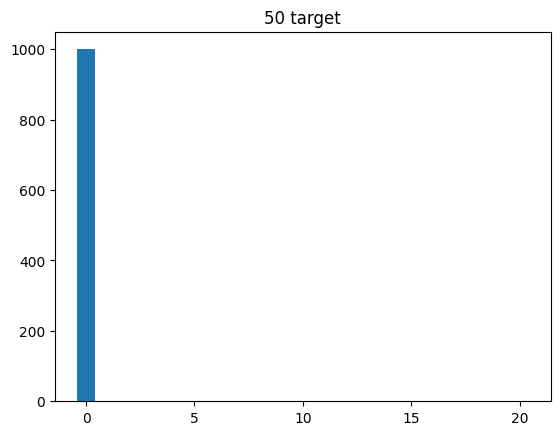

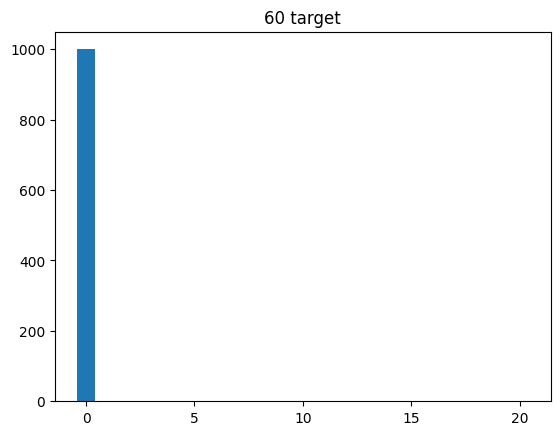

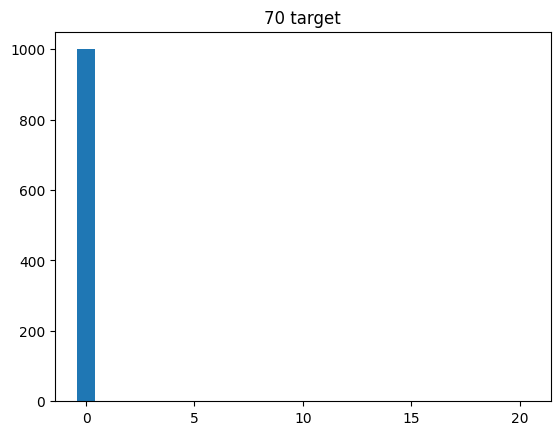

In [17]:
np.random.seed(1)

C = [20, 30, 40, 50, 60, 70]

for j in C:
    winlose = []
    for i in range(1000):
        money, B = simulate_gambler_ruin(10,j,.45)
        winlose.append(B)
    fig, ax = plt.subplots()
    x = [0,20]
    y = [winlose.count(0), winlose.count(20)]
    ax.bar(x,y)
    plt.title(f'{j} target')
    plt.show()

### 8. Simulation with Unbounded Target (Infinite Capital)

In this problem, the gambler's target is effectively unbounded (i.e., the gambler always wants to win more and only stops if ruined). We use the following parameters:
- **Initial Budget (B):** 10
- **Winning Probability (p):** 0.5 (fair game)
- **Maximum Bets:** 10,000 (to prevent an infinite simulation)

**Task:**  
- Run the simulation 1,000 times.  
- In each simulation, allow the gambler to bet up to 10,000 times, stopping earlier if ruin (capital reaches 0) occurs.  
- Record the final capital after each simulation (if the maximum bet limit is reached before ruin, record the current capital).  
- Visualize the distribution of the final capitals using a histogram.


In [18]:
def inf_simulate_gambler_ruin(initial_budget, target, p):
    B = initial_budget
    money = [B]
    count = 0

    while B > 0 and B < target and count <= 10000:
        B += np.random.choice([1,-1], p=[p, 1-p])
        money.append(B)
        count += 1

    return money, B

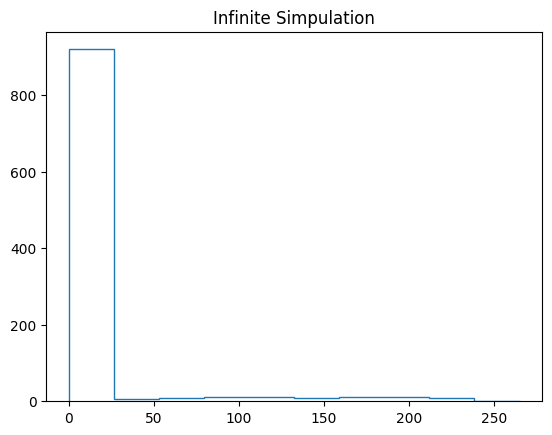

In [20]:
winlose = []
for i in range(1000):
    money, B = inf_simulate_gambler_ruin(10,10000,.5)
    winlose.append(B)
counts, bins = np.histogram(winlose)
plt.stairs(counts,bins)
plt.title(f'Infinite Simpulation')
plt.show()

### 9. Impact of Target Capital

**Task:**  
- With fixed parameters (p = 0.45 and B = 10), vary the target capital (C) using the list `[20, 30, 40, 50, 60, 70]`.
- For each target capital, simulate the game 1000 times and record the exit states.
- Visualize the relationship between the target capital and the exit states (e.g., compute and plot the win rate, where a win means the exit state equals the target capital).
- Compare these results with Problem 8. What do you observe?


In [23]:
def thousand_simulate_gambler_ruin(initial_budget, target, p):
    B = initial_budget
    money = [B]
    count = 0

    while B < target and count <= 1000:
        B += np.random.choice([1,-1], p=[p, 1-p])
        money.append(B)
        count += 1

    return money, B

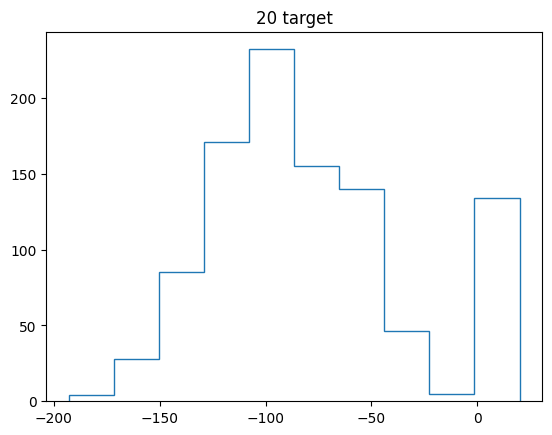

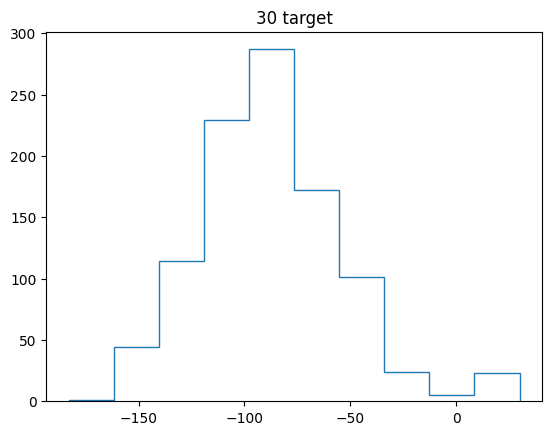

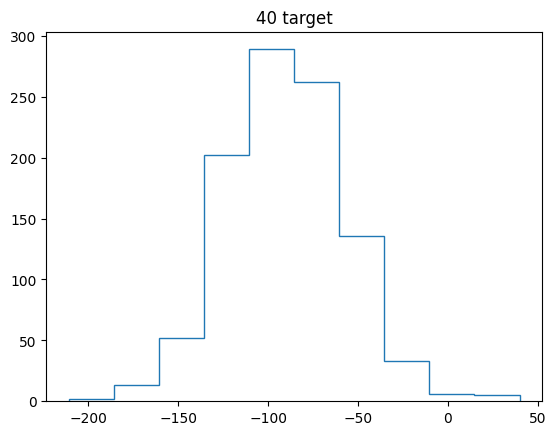

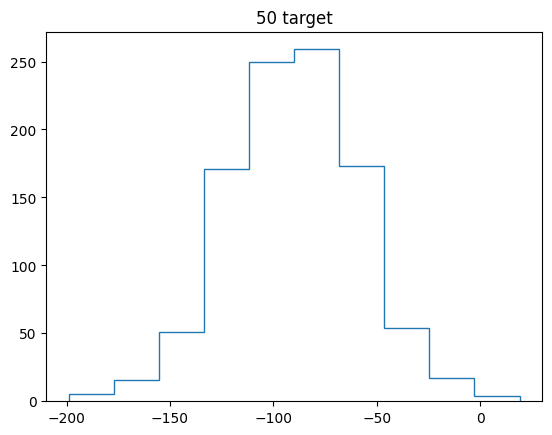

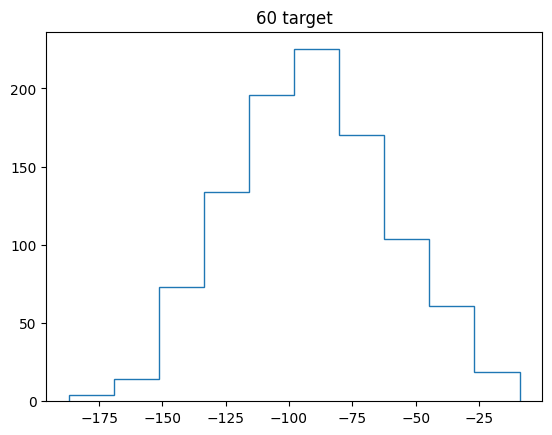

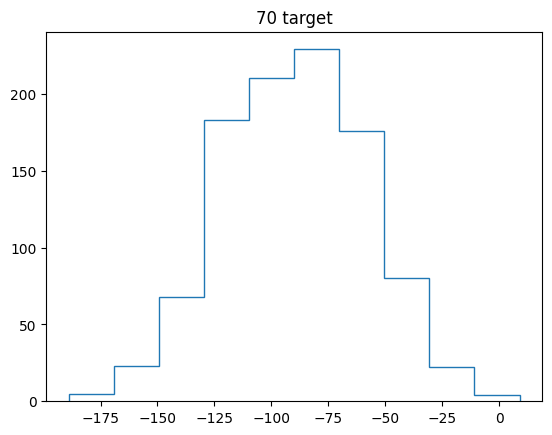

In [24]:
np.random.seed(1)

C = [20, 30, 40, 50, 60, 70]

for j in C:
    winlose = []
    for i in range(1000):
        money, B = thousand_simulate_gambler_ruin(10,j,.45)
        winlose.append(B)
    counts,bins = np.histogram(winlose)
    plt.stairs(counts,bins)
    plt.title(f'{j} target')
    plt.show()

### With the infinite bets until ruined, its evident most of the time that he will ruin. For the 1000 bets no matter what, he still goes under more but it follows more of a normal distribution

# 10. Coupon Collector Problem with a Twist

Suppose you are the boss of a company that issues 10 types of collectible cards. Each box costs \$2 and contains one random card. The cards have non-uniform probabilities given by:

- **Card 1 (common card):** probability = $\frac{1+p}{10}$
- **Cards 2 to 9:** probability = $\frac{1}{10}$ each
- **Card 10 (rare card):** probability = $\frac{1-p}{10}$

Since these probabilities add to 1, they form a valid distribution regardless of $p$.

**Task:**  
You want to make the expected value of a full collection (i.e. collect all 10 types) be \$10,000. 

Given this goal, use python and simulation to determine the best value of $p$ and the probability of having a rare type of card.


**Hint:**
1. Write a simulation function that counts how many boxes are needed to collect all 10 cards.
2. Since each box costs \$2, a customer needs on average 5,000 boxes to complete the collection. Your goal is to determine the value of \( p \) such that the simulation yields an average of 5,000 boxes per complete collection.
3. Use a search method (e.g., binary search) to “tune” $p$ until the expected number of boxes is approximately 5,000.


In [52]:
np.random.seed(1)
def prob_to_get_all_10(p):
    count = 0
    cardsigot = []

    while len(cardsigot) < 10:
        pull = np.random.choice([1,2,3,4,5,6,7,8,9,10], p=[(1+p)/10,1/10,1/10,1/10,1/10,1/10,1/10,1/10,1/10,(1-p)/10])
        if pull not in cardsigot:
            cardsigot.append(pull)
        count+=1

    #return cost
    return count * 2

In [109]:
low, high = 0,1
tolerance = 5
target = 10000

out = 0

while (high-low > 1e-100):
    p = (low + high)/2
    cost = prob_to_get_all_10(p)

    if(cost > target + tolerance):
        high = p
    elif(cost < target-tolerance):
        low = p
    else:
        out = 1
        break



if out == 0:
    p = (high + low)/2

print(out)
print(p)

0
0.9979079069450989


In [110]:
sum = 0 
for i in range(1, 1001):
    sum += prob_to_get_all_10(p)
    print("Cur Average")
    print(sum/i)

print("Average Price")
print(sum/1000)

Cur Average
14642.0
Cur Average
11873.0
Cur Average
12038.666666666666
Cur Average
9507.0
Cur Average
10202.0
Cur Average
9794.333333333334
Cur Average
8506.57142857143
Cur Average
8774.5
Cur Average
7839.333333333333
Cur Average
13719.2
Cur Average
14673.818181818182
Cur Average
13681.5
Cur Average
14377.846153846154
Cur Average
13640.57142857143
Cur Average
14178.266666666666
Cur Average
14448.375
Cur Average
13780.470588235294
Cur Average
13051.777777777777
Cur Average
12403.473684210527
Cur Average
12569.0
Cur Average
12041.714285714286
Cur Average
11514.09090909091
Cur Average
11229.217391304348
Cur Average
10907.416666666666
Cur Average
10670.8
Cur Average
10382.076923076924
Cur Average
10323.25925925926
Cur Average
10166.357142857143
Cur Average
10356.620689655172
Cur Average
10927.0
Cur Average
10656.774193548386
Cur Average
10332.125
Cur Average
10088.969696969696
Cur Average
9834.882352941177
Cur Average
9756.228571428572
Cur Average
9686.944444444445
Cur Average
10358.108108

In [111]:
print(f'p needed ot get average of $10000 to get all cards: {p}')

p needed ot get average of $10000 to get all cards: 0.9979079069450989
